# Real Estate data Analysis

In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import warnings
%matplotlib inline
import seaborn as sns

# Original scraped data

In [3]:
org = pd.read_excel("C:/Users/Lenovo/Downloads/Scrapdata.xlsx")

In [4]:
org.head()

,price,bhk,detail
0,1.57 Cr ₹ 1.57 Cr,1 BHK Apartment,460 sqft Ready to Move 5 New Property Unfurnis...
1,1.85 Cr ₹ 1.85 Cr,2 BHK Apartment,670 sqft Ready to Move New Property Semi-Furni...
2,37.1 Lac ₹ 37.1 Lac,1 BHK Apartment,410 sqft Ready to Move New Property Unfurnishe...
3,1.15 Cr ₹ 1.15 Cr,1 BHK Apartment,488 sqft Possession by Apr '20 New Property Un...
4,39.3 Lac ₹ 39.3 Lac,1 BHK Apartment,439 sqft Possession by Jun '21 New Property Un...


In [5]:
org.describe(include="all")

,price,bhk,detail
count,1500,1500,1500
unique,395,26,1498
top,1.50 Cr ₹ 1.50 Cr,2 BHK Apartment,800 sqft Ready to Move Resale Semi-Furnished E...
freq,28,602,2


# Modified in Excel

In [6]:
df = pd.read_excel("C:/Users/Lenovo/Desktop/extra/desktop/real_estate_data.xlsx")

In [7]:
df.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished,details
0,1.57,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished,Alfa Mana A M Residency
1,1.85,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished,Heights 1 Covered 2
2,37.10,Lac,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished,Baria Everest 2
3,1.15,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished,Sonal Heights 1
4,39.30,Lac,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished,Joyville Virar 1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
price           1500 non-null float64
unit            1500 non-null object
No_of_rooms     1500 non-null object
bhk             1496 non-null object
type            1482 non-null object
area            1500 non-null int64
area_unit       1500 non-null object
type_of_move    1500 non-null object
month           1500 non-null object
day             1500 non-null object
New_old         1500 non-null object
furnished       1498 non-null object
details         1465 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 152.4+ KB


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [10]:
print("furnished: ",df["furnished"].unique())
print("unit: ",df["unit"].unique())
print("No_of_rooms: ",df["No_of_rooms"].unique())
print("bhk: ",df["bhk"].unique())
print("type: ",df["type"].unique())
print("area_unit: ",df["area_unit"].unique())
print("type_of_move: ",df["type_of_move"].unique())

furnished:  ['Unfurnished' 'Semi-Furnished' 'furnished' 'Furnished' 'Basement'
 'Resale' 'South' 'West' nan 'Society' 'Garden/Park,' 'Garden/Park'
 'Co-operative' 1 3 'Main' 'Freehold']
unit:  ['Cr' 'Lac']
No_of_rooms:  [1 2 3 4 5 'Studio' 'House' 'Apartment' 6]
bhk:  ['BHK' 'Apartment' nan]
type:  ['Apartment' 'Villa' 'House' 'Builder' nan 'Penthouse']
area_unit:  ['sqft' 'qm' 'qft' 'sqm' 'bigha']
type_of_move:  ['Ready' 'Possession' 'New' 20 40 16 27 14 9 1 7 2 6 12 5 3 19 18]


In [11]:
df.describe(include="all")

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished,details
count,1500.000000,1500,1500.0,1496,1482,1500.000000,1500,1500,1500,1500.0,1500,1498,1465
unique,NaN,2,9.0,2,5,NaN,5,18,13,43.0,1,16,530
top,NaN,Cr,2.0,BHK,Apartment,NaN,sqft,Ready,Jan,1.0,New,furnished,floors Resale Semi-Furnished North -
freq,NaN,1048,641.0,1482,1373,NaN,1492,1101,1121,270.0,1500,1334,41
mean,21.160020,NaN,NaN,NaN,NaN,776.986000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,30.478536,NaN,NaN,NaN,NaN,495.812281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.700000,NaN,NaN,NaN,NaN,467.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.950000,NaN,NaN,NaN,NaN,675.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(1500, 13)

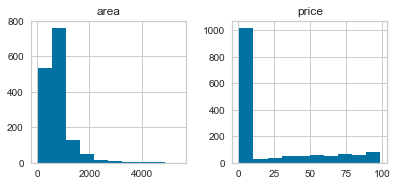

In [13]:
df.hist(layout = (2, 3), figsize = (10, 6))
plt.show()

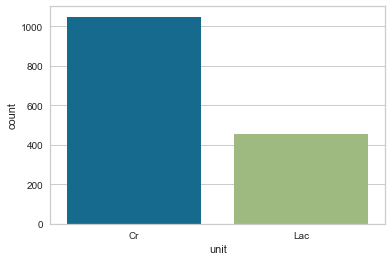

In [14]:
sns.countplot(x = df.unit)
plt.show()

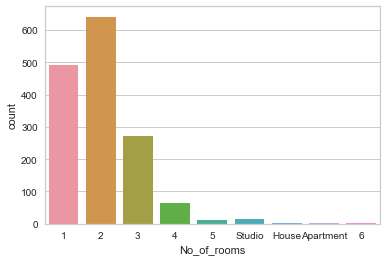

In [15]:
sns.countplot(x = df["No_of_rooms"])
plt.show()

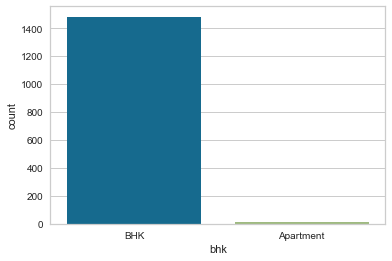

In [16]:
sns.countplot(x = df["bhk"])
plt.show()

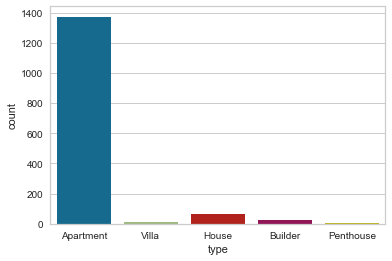

In [17]:
sns.countplot(x = df["type"])
plt.show()

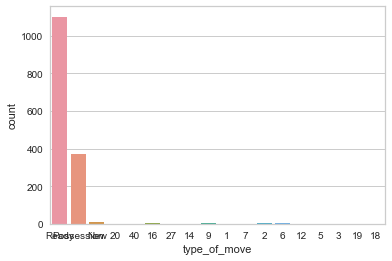

In [18]:
sns.countplot(x = df["type_of_move"])
plt.show()

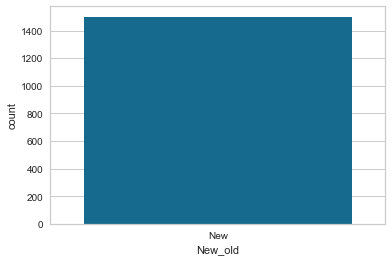

In [19]:
sns.countplot(x = df["New_old"])
plt.show()

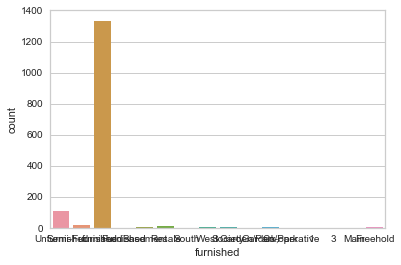

In [20]:
sns.countplot(x = df["furnished"])
plt.show()

# EDA

In [21]:
df1=df.drop("details",axis=1)

In [22]:
df1.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished
0,1.57,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished
1,1.85,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished
2,37.10,Lac,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished
3,1.15,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished
4,39.30,Lac,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished


In [23]:
df2=df1

In [24]:
df2.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished
0,1.57,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished
1,1.85,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished
2,37.10,Lac,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished
3,1.15,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished
4,39.30,Lac,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished


In [25]:
#converting the unit into one unit
for i in range(len(df2)):
    if df2.unit[i]=="Lac":
        df2.price[i]=df2.price[i]/100
        df2.unit[i]="Cr"
    else:
        df2.price[i]=df2.price[i]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
df2.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished
0,1.570,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished
1,1.850,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished
2,0.371,Cr,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished
3,1.150,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished
4,0.393,Cr,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished


In [27]:
df2.unit.unique()

array(['Cr'], dtype=object)

In [28]:
#converting land unit into one unit
#ibigah=17452.0069808sqft 1sqm=10.7639sqft
for i in range(len(df2)):
    if df2.area_unit[i]=="qm" or df2.area_unit[i]=="sqm":
        df2.area[i]=df2.area[i]*10.7639
        df2.area_unit[i]="sqft"
    elif df2.area_unit[i]=="bigha":
        df2.area[i]=df2.area[i]*17452.0069808
        df2.area_unit[i]="sqft"
    elif df2.area_unit[i]=="qft":
        df2.area_unit[i]="sqft"
        

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCop

In [29]:
df2.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished
0,1.570,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished
1,1.850,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished
2,0.371,Cr,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished
3,1.150,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished
4,0.393,Cr,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished


In [30]:
df2.area_unit.unique()

array(['sqft'], dtype=object)

In [31]:
group_price=df2.groupby("No_of_rooms").mean()
group_price

,price,area
No_of_rooms,,
1,0.909973,15572.171429
2,1.865711,734.639626
3,3.665147,1117.213235
4,8.542857,2057.047619
5,12.295833,3078.250000
6,7.175000,2297.500000
Apartment,4.105000,850.000000
House,0.439500,420.000000
Studio,0.686429,290.714286


In [32]:
#by knowledge of scraping and studies made on the data converting the type of furnish

for i in range(len(df2)):
    if df2.furnished[i]=="furnished" or df2.area_unit[i]=="Furnished":
        df2.furnished[i]="Furnished"        
    elif df2.furnished[i]=='Unfurnished':
        df2.furnished[i]='Unfurnished'
    elif df2.furnished[i]=='Semi-Furnished':
        df2.furnished[i]='Semi-Furnished'
    else:
        df2.furnished[i]="Furnished"
        
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value 

In [33]:
df2.furnished.unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [34]:
df2.isnull().sum()

price            0
unit             0
No_of_rooms      0
bhk              4
type            18
area             0
area_unit        0
type_of_move     0
month            0
day              0
New_old          0
furnished        0
dtype: int64

In [35]:
df2.fillna(method='ffill',inplace=True) #after analysing the original data values filled 

In [36]:
df2.isnull().sum()

price           0
unit            0
No_of_rooms     0
bhk             0
type            0
area            0
area_unit       0
type_of_move    0
month           0
day             0
New_old         0
furnished       0
dtype: int64

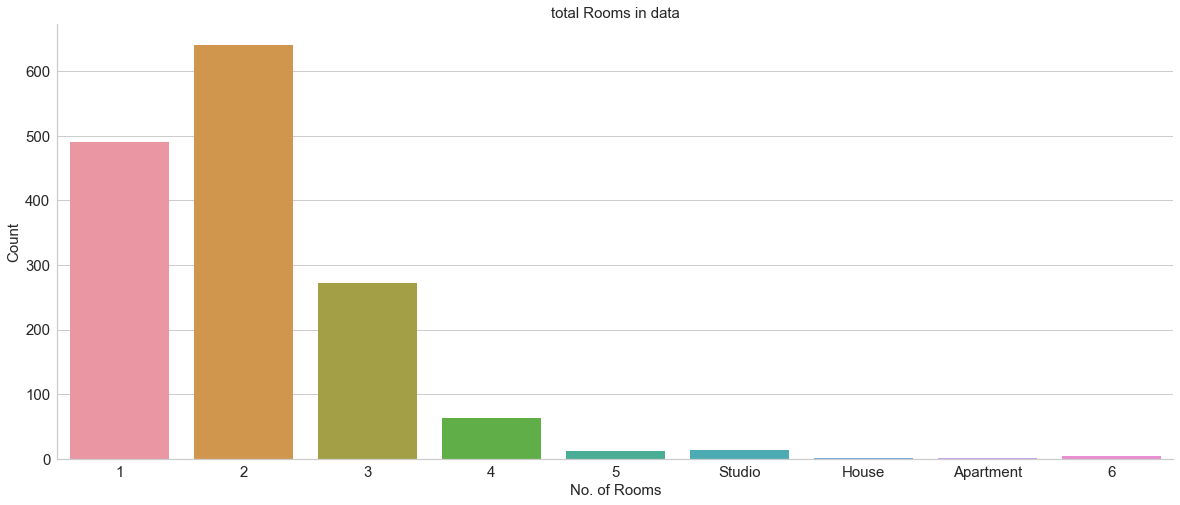

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='No_of_rooms', data = df2)
ax.set_xlabel('No. of Rooms', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('total Rooms in data', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

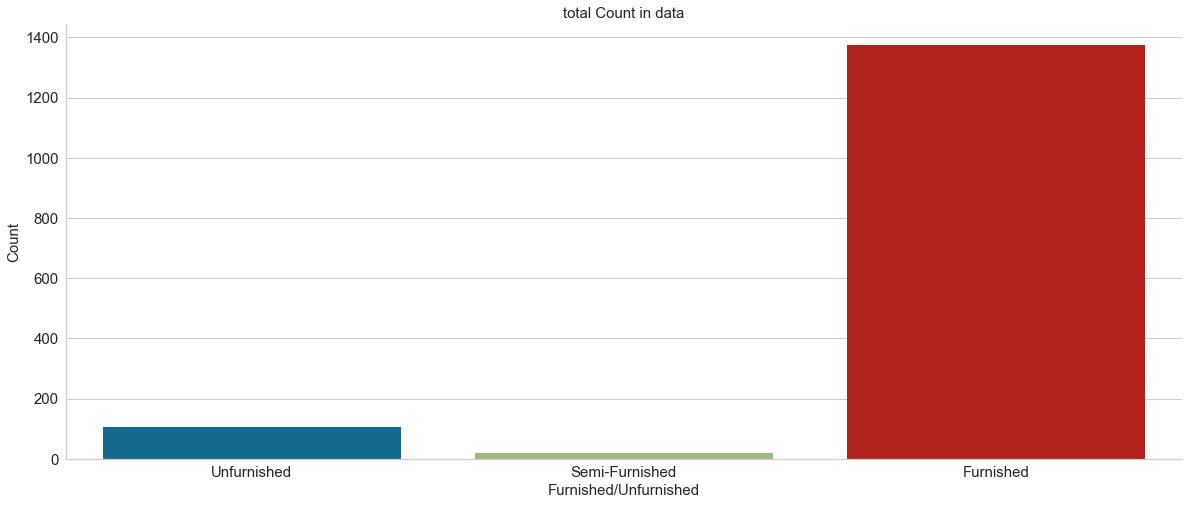

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x ='furnished', data = df2)
ax.set_xlabel('Furnished/Unfurnished', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('total Count in data', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [39]:
df2.corr()

,price,area
price,1.000000,-0.013116
area,-0.013116,1.000000


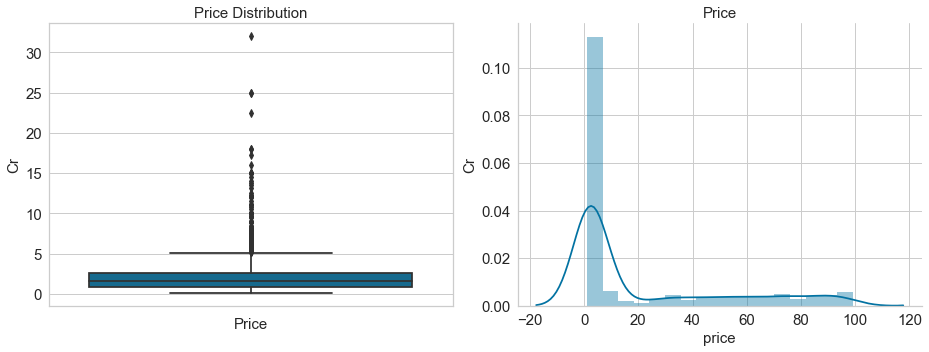

In [40]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'price', data = df2, orient = 'v', ax = ax1)
ax1.set_xlabel('Price', fontsize=15)
ax1.set_ylabel('Cr', fontsize=15)
ax1.set_title('Price Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['price'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.set_ylabel('Cr', fontsize=15)
ax2.set_title('Price', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

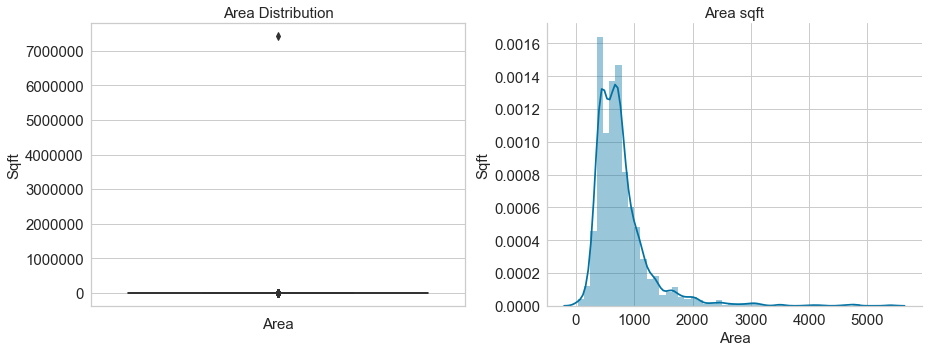

In [41]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'area', data = df2, orient = 'v', ax = ax1)
ax1.set_xlabel('Area', fontsize=15)
ax1.set_ylabel('Sqft', fontsize=15)
ax1.set_title('Area Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['area'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Area', fontsize=15)
ax2.set_ylabel('Sqft', fontsize=15)
ax2.set_title('Area sqft', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [42]:
#after analysis of bad corelation featured a new column of price/unit=rate_sqft

In [43]:
df3 = df2.assign(Rate_sqft = (df2.price*10000000)/df2.area) 

In [44]:
df3.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished,Rate_sqft
0,1.570,Cr,1,BHK,Apartment,460,sqft,Ready,Jan,5,New,Unfurnished,34130.434783
1,1.850,Cr,2,BHK,Apartment,670,sqft,Ready,Jan,1,New,Semi-Furnished,27611.940299
2,0.371,Cr,1,BHK,Apartment,410,sqft,Ready,Jan,1,New,Unfurnished,9048.780488
3,1.150,Cr,1,BHK,Apartment,488,sqft,Possession,Apr,20,New,Unfurnished,23565.573770
4,0.393,Cr,1,BHK,Apartment,439,sqft,Possession,Jun,21,New,Unfurnished,8952.164009


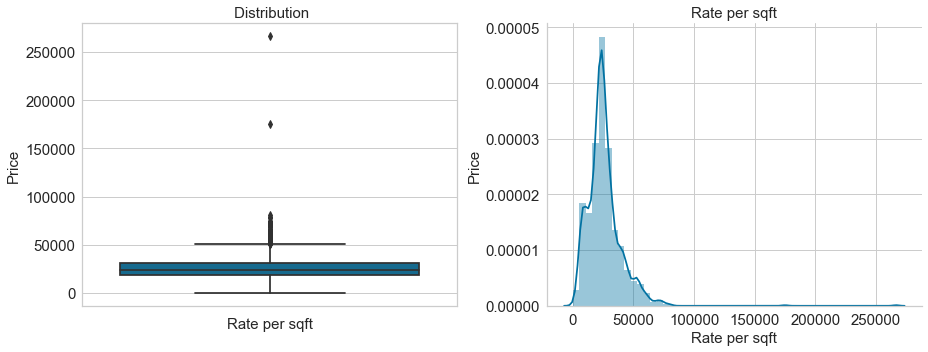

In [45]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Rate_sqft', data = df3, orient = 'v', ax = ax1)
ax1.set_xlabel('Rate per sqft', fontsize=15)
ax1.set_ylabel('Price', fontsize=15)
ax1.set_title(' Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df3['Rate_sqft'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel("Rate per sqft", fontsize=15)
ax2.set_ylabel('Price', fontsize=15)
ax2.set_title('Rate per sqft', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [46]:
df3.corr()#corelation improved 

,price,area,Rate_sqft
price,1.000000,-0.013116,0.619728
area,-0.013116,1.000000,-0.044527
Rate_sqft,0.619728,-0.044527,1.000000


In [47]:
df3.groupby(["type"]).mean()

,price,area,Rate_sqft
type,,,
Apartment,2.258227,770.571942,26255.758253
Builder,1.359107,644.464286,21810.944704
House,1.847000,116652.062500,24510.269661
Penthouse,12.150000,2151.750000,51177.002532
Villa,2.005643,1714.571429,12672.906845


In [48]:
df3.groupby(["type"]).count()

,price,unit,No_of_rooms,bhk,area,area_unit,type_of_move,month,day,New_old,furnished,Rate_sqft
type,,,,,,,,,,,,
Apartment,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390
Builder,28,28,28,28,28,28,28,28,28,28,28,28
House,64,64,64,64,64,64,64,64,64,64,64,64
Penthouse,4,4,4,4,4,4,4,4,4,4,4,4
Villa,14,14,14,14,14,14,14,14,14,14,14,14


### After analysis of data majority of the segment belongs to apartment and after changing the grouping (more than 95% data )

In [49]:
df_appartment=df2[df2.type=="Apartment"]

In [50]:
df_appartment.count()

price           1390
unit            1390
No_of_rooms     1390
bhk             1390
type            1390
area            1390
area_unit       1390
type_of_move    1390
month           1390
day             1390
New_old         1390
furnished       1390
dtype: int64

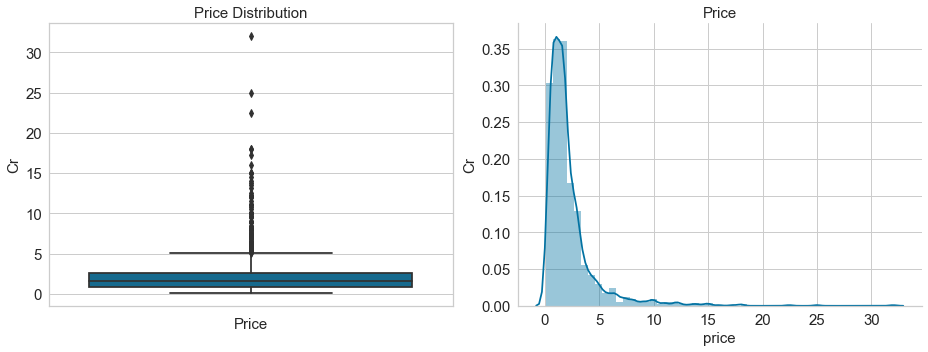

In [51]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'price', data = df_appartment, orient = 'v', ax = ax1)
ax1.set_xlabel('Price', fontsize=15)
ax1.set_ylabel('Cr', fontsize=15)
ax1.set_title('Price Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_appartment['price'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.set_ylabel('Cr', fontsize=15)
ax2.set_title('Price', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [52]:
df_appartment.corr() #corelation further increased 

,price,area
price,1.000000,0.865615
area,0.865615,1.000000


In [53]:
df_house=df2[df3.type=="House"]

In [54]:
df_house.head()

,price,unit,No_of_rooms,bhk,type,area,area_unit,type_of_move,month,day,New_old,furnished
64,1.350,Cr,2,BHK,House,590,sqft,Possession,May,25,New,Furnished
406,0.513,Cr,1,BHK,House,388,sqft,Possession,Dec,22,New,Furnished
414,0.530,Cr,1,BHK,House,385,sqft,Ready,Jan,1,New,Furnished
455,0.485,Cr,2,BHK,House,594,sqft,Ready,Jan,1,New,Furnished
487,0.400,Cr,1,BHK,House,180,sqft,Ready,Jan,1,New,Furnished


In [55]:
df_house.corr()

,price,area
price,1.00000,-0.06087
area,-0.06087,1.00000


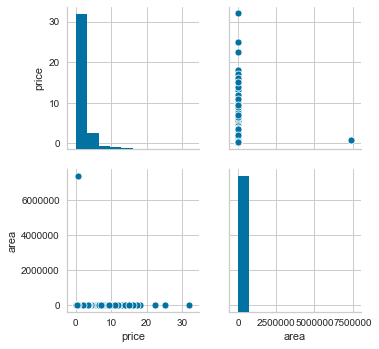

In [56]:
import seaborn as sns
sns.pairplot(df2)

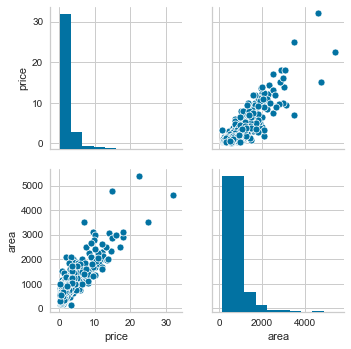

In [57]:
import seaborn as sns
sns.pairplot(df_appartment)

In [58]:
#df_appartment.to_excel("clean_dataset_realestate.xlsx")  

# Modeling

In [59]:
dum_df=df_appartment
from sklearn.preprocessing import OneHotEncoder
# generate binary values using get_dummies
dum_df = pd.get_dummies(dum_df, columns=['unit', 'No_of_rooms', 'bhk', 'type', 'area_unit','type_of_move', 'month', 'day', 'New_old', 'furnished'], drop_first=True)
# merge with main df bridge_df on key values
#df_appartment =df_appartment.join(dum_df)
dum_df.head()

,price,area,No_of_rooms_2,No_of_rooms_3,No_of_rooms_4,No_of_rooms_5,No_of_rooms_6,No_of_rooms_Apartment,No_of_rooms_House,No_of_rooms_Studio,...,day_37,day_41,day_42,day_45,day_47,day_51,day_Regent,day_Symbolic,furnished_Semi-Furnished,furnished_Unfurnished
0,1.570,460,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.850,670,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.371,410,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.150,488,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.393,439,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scaled_df = scaler.fit_transform(dum_df)
std_scaled_df = pd.DataFrame(std_scaled_df, columns=dum_df.columns)
std_scaled_df.head()

,price,area,No_of_rooms_2,No_of_rooms_3,No_of_rooms_4,No_of_rooms_5,No_of_rooms_6,No_of_rooms_Apartment,No_of_rooms_House,No_of_rooms_Studio,...,day_37,day_41,day_42,day_45,day_47,day_51,day_Regent,day_Symbolic,furnished_Semi-Furnished,furnished_Unfurnished
0,-0.272409,-0.661004,-0.874048,-0.47854,-0.193167,-0.085126,-0.046507,-0.037959,-0.037959,-0.097164,...,-0.026832,-0.026832,-0.026832,-0.053722,-0.026832,-0.026832,-0.026832,-0.026832,-0.104447,3.480403
1,-0.161582,-0.214052,1.144102,-0.47854,-0.193167,-0.085126,-0.046507,-0.037959,-0.037959,-0.097164,...,-0.026832,-0.026832,-0.026832,-0.053722,-0.026832,-0.026832,-0.026832,-0.026832,9.574271,-0.287323
2,-0.746990,-0.767421,-0.874048,-0.47854,-0.193167,-0.085126,-0.046507,-0.037959,-0.037959,-0.097164,...,-0.026832,-0.026832,-0.026832,-0.053722,-0.026832,-0.026832,-0.026832,-0.026832,-0.104447,3.480403
3,-0.438651,-0.601410,-0.874048,-0.47854,-0.193167,-0.085126,-0.046507,-0.037959,-0.037959,-0.097164,...,-0.026832,-0.026832,-0.026832,-0.053722,-0.026832,-0.026832,-0.026832,-0.026832,-0.104447,3.480403
4,-0.738282,-0.705699,-0.874048,-0.47854,-0.193167,-0.085126,-0.046507,-0.037959,-0.037959,-0.097164,...,-0.026832,-0.026832,-0.026832,-0.053722,-0.026832,-0.026832,-0.026832,-0.026832,-0.104447,3.480403


In [60]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df_appartment.select_dtypes(np.number),'price')

 VIF score for area is: 1.0


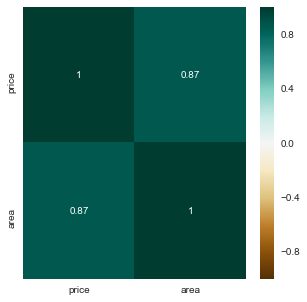

In [117]:
plt.figure(figsize=(5,5))
c= df_appartment.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

In [71]:
X=dum_df.drop(["price"],axis=1)
y=dum_df.price

In [72]:
#cross validation,residual plot

In [73]:
from sklearn.model_selection import train_test_split 
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

In [74]:
#Model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train, y_train)

In [126]:
#!pip install yellowbrick

In [79]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.779170236920887
R-squared Testing 0.7480403750046536
Train RMSE :  1.164776181088653
Test RMSE :  1.3598934907245843


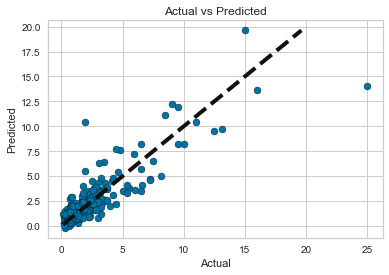

In [80]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

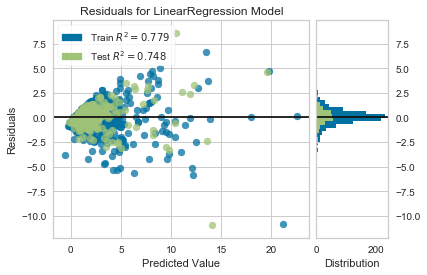

In [78]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Model selection and tunning parameters 

# Ridge

In [105]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
result1 = model.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7222895168340653
1.0


In [106]:
y_train_pred = result1.predict(X_train)
y_test_pred = result1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.7740659746211068
R-squared Testing 0.7584271214102775
Train RMSE :  1.1846180167073332
Test RMSE :  1.3067108653377806


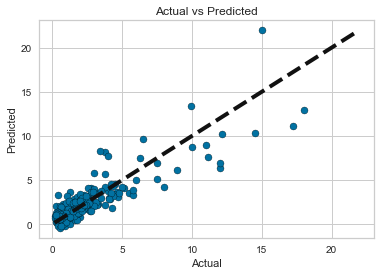

In [107]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

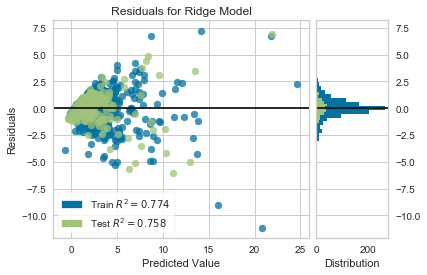

In [108]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# LASSO

In [110]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
result2 = model.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7319722129874612
0.01


In [111]:
y_train_pred = result2.predict(X_train)
y_test_pred = result2.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.7497698826636172
R-squared Testing 0.7475293035518371
Train RMSE :  1.2466866337325822
Test RMSE :  1.335859871614771


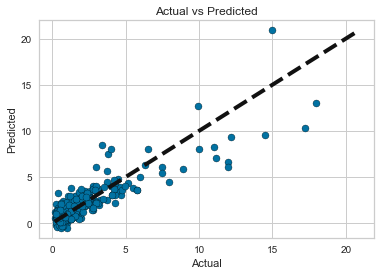

In [112]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

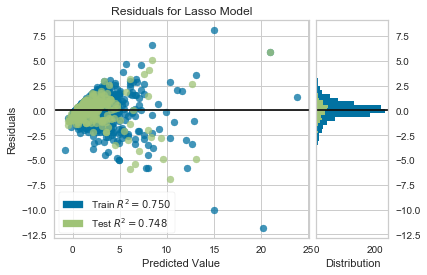

In [113]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot
model = Lasso()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

 # Decision tree

In [ ]:
X=dum_df.drop(["price"],axis=1)
y=dum_df.price

In [131]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
# Create an scaler object
sc = StandardScaler()
max_depth=[8,12]

    
    # Create a logistic regression object with an L2 penalty
decisiontree = tree.DecisionTreeRegressor()

    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('sc', sc),('decisiontree', decisiontree)])

    # Create Parameter Space
    # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X.shape[1]+1,1))

    # Create lists of parameter for Decision Tree Classifier


    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(decisiontree__max_depth=max_depth)

    # Conduct Parameter Optmization With Pipeline
    # Create a grid search object
clf = GridSearchCV(pipe, parameters)

    # Fit the grid search
clf.fit(X, y)

    # View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])

print(); print(clf.best_estimator_.get_params()['decisiontree'])

    # Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: mse
Best max_depth: 8

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

[ 0.77368535 -0.03710551  0.58675933  0.62298516]

0.4865810836956479

0.3103700466233646


In [115]:
clf.best_params_

{'decisiontree__max_depth': 8}

In [116]:
clf.best_score_

0.5188110066244027

# Bagged Decision Tree

In [81]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
single_estimator = DecisionTreeRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

In [84]:
param_grid = param_grid = {'oob_score' : [True, False],'n_estimators':[100,150],'base_estimator__max_depth':[3,5],
                           "base_estimator__min_samples_leaf": [2,5],"base_estimator__min_samples_split":[2,4],}
random_bag = GridSearchCV(ensemble_estimator,param_grid, cv=10,n_jobs=-1)
random_bag.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fraction_leaf=0.0,
                                                          

In [85]:
random_bag.best_params_

{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__min_samples_split': 4,
 'n_estimators': 150,
 'oob_score': True}

In [86]:
DTbagging_model_1 = random_bag.best_estimator_
DTbagging_model_1.fit(X_train, y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=5,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=5,
                                                      min_samples_split=4,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [87]:
y_train_pred = DTbagging_model_1.predict(X_train)
y_test_pred = DTbagging_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.8028937884960422
R-squared Testing 0.6873804017794123
Train RMSE :  1.15757418745997
Test RMSE  :  1.213336537092128


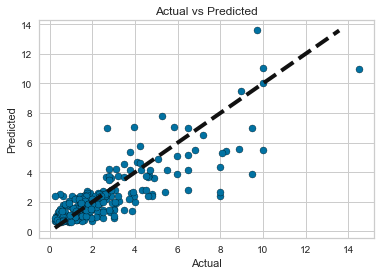

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Bagging KNeighborsRegressor

In [89]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [91]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

In [93]:
param_grid = {'oob_score' : [True, False],
              'n_estimators': [100,150],
              'base_estimator__n_neighbors':[3,7,9]
              }
random_bag = GridSearchCV(ensemble_estimator,param_grid, cv=10,n_jobs=-1)
random_bag.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=5,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                         

In [94]:
random_bag.best_params_

{'base_estimator__n_neighbors': 7, 'n_estimators': 100, 'oob_score': True}

In [95]:
bagging_model_1 = random_bag.best_estimator_
bagging_model_1.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=7,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=True,
                 random_state=None, verbose=0, warm_start=False)

In [96]:
y_train_pred = bagging_model_1.predict(X_train)
y_pred = bagging_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.8006695729706274
R-squared Testing 0.6900601596988738
Train RMSE :  1.1771336160944617
Test RMSE  :  1.1245639905467328


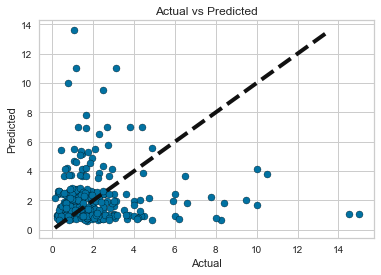

In [97]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Gradient Boosting Regression

In [98]:
bins = 50*np.arange(10)
binned_y = np.digitize(y,bins,right=False)

In [99]:
from sklearn.model_selection import train_test_split
seed=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed,stratify=binned_y)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid =  {
              'max_depth':[5,7],
              'min_samples_split':[10,15],
              'min_samples_leaf':[12,15],
              'n_estimators':[100],
              'learning_rate':[0.001,0.01,0.05,0.3],
               'loss':['ls','huber']
              }
Boosted_Regressor = GridSearchCV(GradientBoostingRegressor(warm_start=True),
                                  param_grid,cv=10,n_jobs=-1)
Boosted_Regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [101]:
Boosted_Regressor.best_params_

{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 5,
 'min_samples_leaf': 12,
 'min_samples_split': 10,
 'n_estimators': 100}

In [102]:
GradientBoosting_model_1=Boosted_Regressor.best_estimator_.fit(X_train,y_train)

In [103]:
y_train_pred = GradientBoosting_model_1.predict(X_train)
y_pred = GradientBoosting_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.7719952014316598
R-squared Testing 0.7919852479863225
Train RMSE :  1.190034376614992
Test RMSE  :  1.2125578925311395


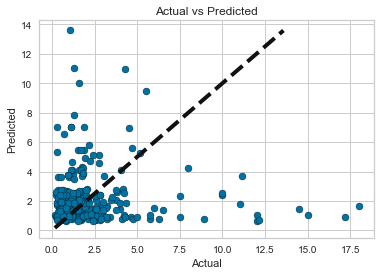

In [104]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# SVR

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [118]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='linear')
regressor.fit(X,y)
#5 Predicting a new result


ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.7533273074954173
R-squared Testing 0.7702232121642322
Train RMSE :  1.2310458117009282
Test RMSE  :  1.2986511226757786


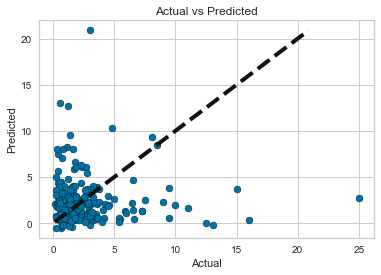

In [121]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()